# 통계학 세미나 HW8

## 212STG10 박영은

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ames = pd.read_csv("Ames.csv")

## 변수 선택

범주형 범수
- LandContour: Flatness of the property
- ExterCond: Evaluates the present condition of the material on the exterior
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- Foundation: Type of foundation

숫자형 범수
- 1stFlrSF: First Floor square feet
- GrLivArea: Above grade (ground) living area square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageArea: Size of garage in square feet
- OpenPorchSF: Open porch area in square feet

In [2]:
# 변수 10개 선택 후 그 변수들로만 이루어진 dataframe 생성
data = ames.loc[:,['LandContour','ExterCond', 'BldgType', 'HouseStyle', 'Foundation', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'OpenPorchSF']]
data.head()

,LandContour,ExterCond,BldgType,HouseStyle,Foundation,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,OpenPorchSF
0,Lvl,TA,1Fam,2Story,PConc,856,1710,8,548,61
1,Lvl,TA,1Fam,1Story,CBlock,1262,1262,6,460,0
2,Lvl,TA,1Fam,2Story,PConc,920,1786,6,608,42
3,Lvl,TA,1Fam,2Story,BrkTil,961,1717,7,642,35
4,Lvl,TA,1Fam,2Story,PConc,1145,2198,9,836,84


## 개별 범주형 변수의 특징

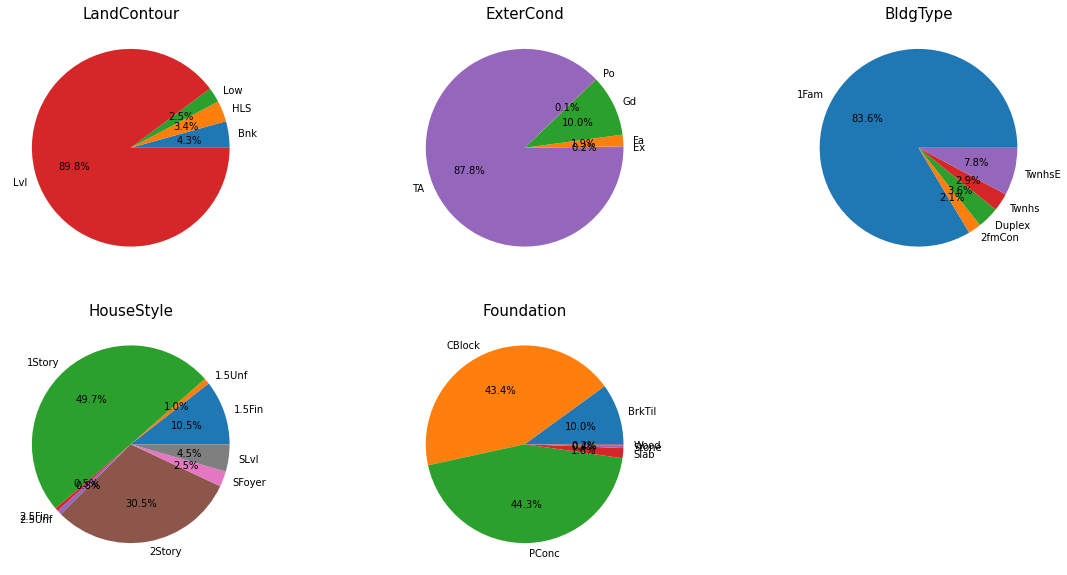

In [3]:
# 5개의 범주형 변수들의 pie chart
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 3, 1)  
labels_1 = ['Bnk', 'HLS', 'Low', 'Lvl']
plt.pie(data['LandContour'].groupby(data['LandContour']).count(),autopct='%.1f%%',labels=labels_1)
plt.title('LandContour', fontsize=15)

plt.subplot(2, 3, 2)  
labels_1 = ['Ex','Fa','Gd','Po','TA']
plt.pie(data['ExterCond'].groupby(data['ExterCond']).count(),autopct='%.1f%%',labels=labels_1)
plt.title('ExterCond', fontsize=15)

plt.subplot(2, 3, 3)  
labels_1 = ['1Fam','2fmCon','Duplex','Twnhs','TwnhsE']
plt.pie(data['BldgType'].groupby(data['BldgType']).count(),autopct='%.1f%%',labels=labels_1)
plt.title('BldgType', fontsize=15)

plt.subplot(2, 3, 4)  
labels_1 = ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
plt.pie(data['HouseStyle'].groupby(data['HouseStyle']).count(),autopct='%.1f%%',labels=labels_1)
plt.title('HouseStyle', fontsize=15)

plt.subplot(2, 3, 5)  
labels_1 = ['BrkTil','CBlock','PConc','Slab','Stone','Wood' ]
plt.pie(data['Foundation'].groupby(data['Foundation']).count(),autopct='%.1f%%',labels=labels_1)
plt.title('Foundation', fontsize=15)

plt.show()

- LandContour: LV2(Near Flat/Level)인 형태의 집이 약 90%를 차지한다.
- ExterCond: 상태가 TA(Average/Typical)인 집이 87%, Gd(Good)인 집이 10%로, 대부분의 집 상태가 양호하다.
- BldgType: 거주 형태가 Single-family Detached인 집이 83%로 대부분을 차지한다. 약 10%는 townhouse(TwnhsE,TwnhsI) 형태이다. 
- HouseStyle: 1Story(One story)인 집이 반 정도이며, 2Story(Two story)인 집이 30%로 그 다음으로 많다.
- Foundation: 대부분의 집이 Pconc(poured contrete), CBlock(cinder block)으로 만들어졌다.

## 개별 연속형 변수의 특징

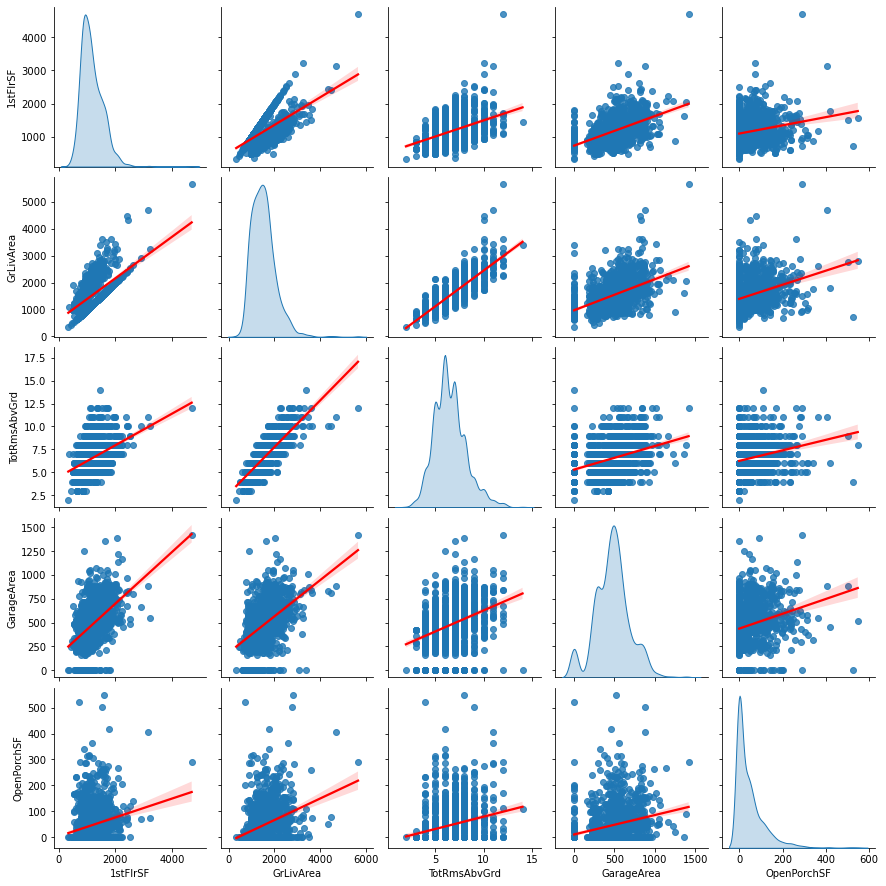

In [4]:
#연속형 변수들의 scatter plot
sns.pairplot(data,
             diag_kind='kde',
             palette='bright',
            kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [5]:
data.corr()

,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,OpenPorchSF
1stFlrSF,1.000000,0.566024,0.409516,0.489782,0.211671
GrLivArea,0.566024,1.000000,0.825489,0.468997,0.330224
TotRmsAbvGrd,0.409516,0.825489,1.000000,0.337822,0.234192
GarageArea,0.489782,0.468997,0.337822,1.000000,0.241435
OpenPorchSF,0.211671,0.330224,0.234192,0.241435,1.000000


- 1stFlrSF와 GrLivArea와 TotRmsAbvGrd 세 변수는 서로 상대적으로 강한 양의 상관관계를 가진다. 
- GarageArea는 1stFlrSF, GrLivArea와 양의 상관관계를 가지지만, 상대적으로 약하다.
- 나머지 변수들은 거의 상관관계를 갖지 않는다. (correlation matrix를 보면 약한 양의 상관관계를 가지는 것으로 나타나지만, plot을 보면 상관계수가 outlier의 영향을 많이 받았을 것이라고 예상된다.)

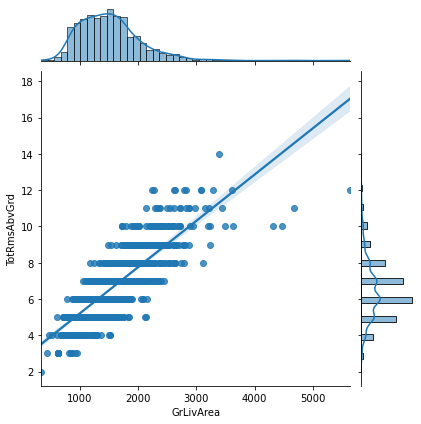

In [6]:
sns.jointplot(x = "GrLivArea",y="TotRmsAbvGrd", data=data , kind="reg")

GrLivArea와 TotRmsAbvGrd는 연속형 변수들 중에서 가장 강한 양의 상관관계를 가진다. (상관계수: 0.83)

## 연속형 변수와 범주형 변수의 관계

### 범주형 변수 household, foundation와 연속형 변수들의 관계

첫 번째로, household 변수의 값 중 가장 많은 부분을 차지하는 1Story, 2tory, 11.5Fin만을 추출하여 연속형 변수들의 plot matrix위에 구별하여 나타내보았다. 두 번째로, foundation 변수의 값 중 가장 많은 부분을 차지하는 PConc, CBlock, BrkTil만을 추출하여 연속형 변수들의 plot matrix위에 구별하여 나타내보았다.

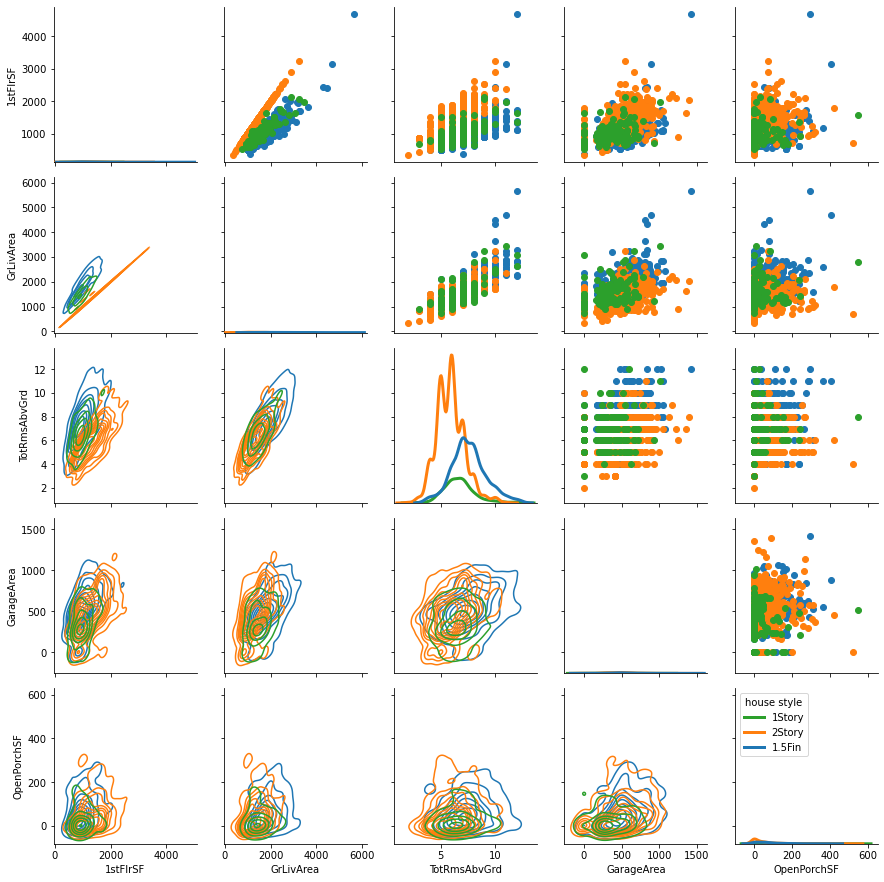

In [7]:
# 1Story, 2tory, 11.5Fin 추출 및 dataframe 생성
data_housestyle = data[(data['HouseStyle']=='1Story')| (data['HouseStyle']=='2Story')|(data['HouseStyle']== '1.5Fin')]

# plot
g = sns.PairGrid(data=data_housestyle,hue='HouseStyle') 
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,lw=3,legend=True)
plt.legend(title='house style', loc='upper left', labels=['1Story', '2Story', '1.5Fin'])
plt.show()

- 1stFlrSF와 GrLivArea의 plot을 보면, housestyle에 따라 분포가 선명하게 나뉘어 나타난다. two story house의 경우에 GrLivArea 대비 1stFlrSF의 크기가 다른 house style에 비해 크다. 
- GrLivArea와 TotRmsAbvGrd의 plot을 보면, 1.5Fin housestyle이 GrLivArea와 TotRmsAbvGrd 변수의 크기가 모두 다른 house style에 비해 상대적으로 크다.

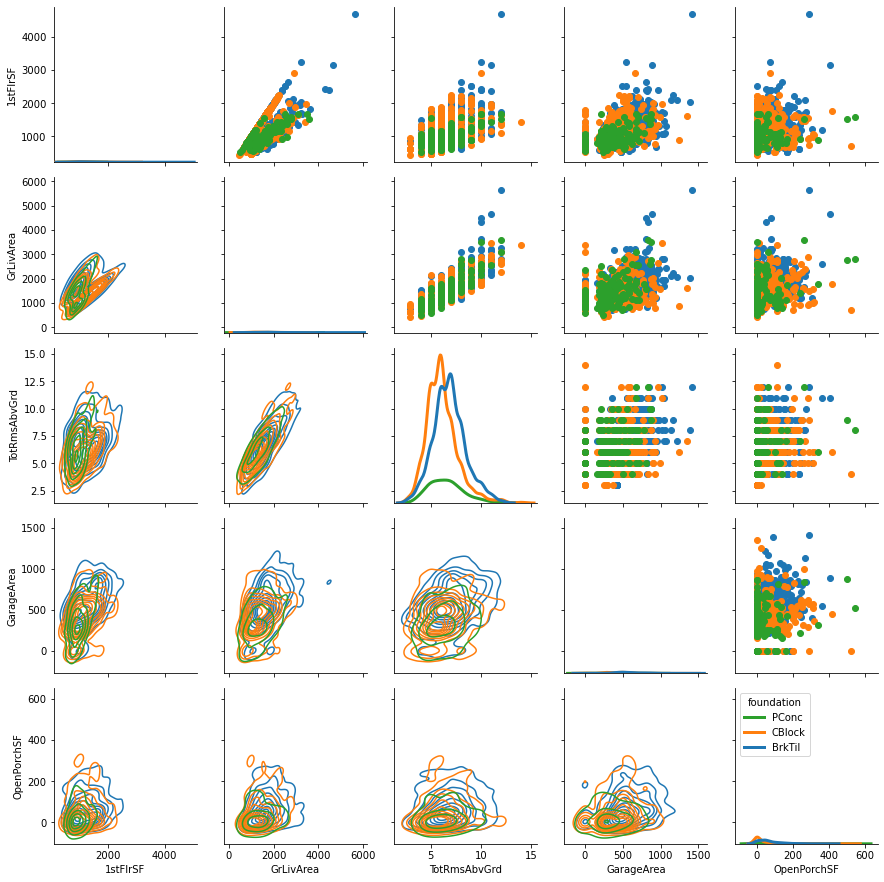

In [8]:
# PConc, CBlock, Brktil 추출 및 dataframe 생성
data_foundation = data[(data['Foundation']=='PConc')| (data['Foundation']=='CBlock')|(data['Foundation']== 'BrkTil')]

#plot
g = sns.PairGrid(data=data_foundation,hue='Foundation') 
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,lw=3,legend=True)
plt.legend(title='foundation', loc='upper left', labels=['PConc', 'CBlock', 'BrkTil'])
plt.show()

foundation 별 차이가 크게 드러나지 않는다. 

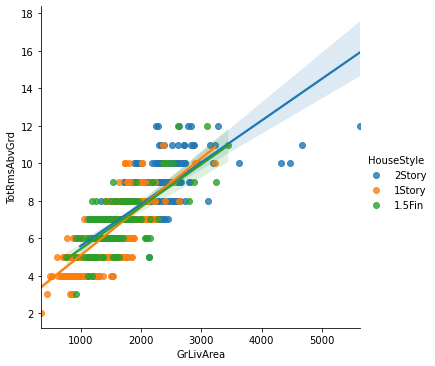

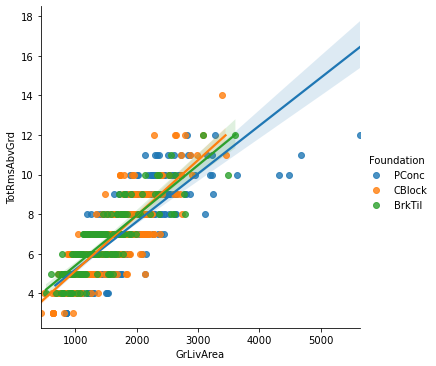

In [9]:
sns.lmplot(x='GrLivArea',y='TotRmsAbvGrd',hue='HouseStyle',data= data_housestyle)
sns.lmplot(x='GrLivArea',y='TotRmsAbvGrd',hue='Foundation',data= data_foundation)
plt.show()

가장 상관관계가 컸던 두 변수의 scatterplot에 house style과 foundation 별로 색을 다르게 하여 표현해본 결과, house style과 foundation 별로 차이가 거의 없었다.

### 하나의 연속형 변수와 범주형 변수들의 boxplot

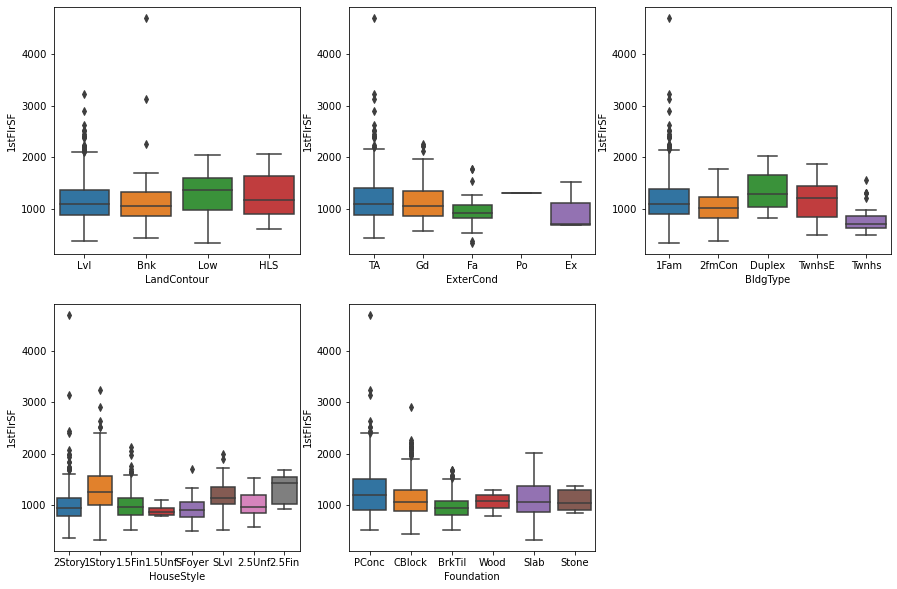

In [10]:
# 1stFlrSF 변수와 연속형 변수들의 관계
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 3, 1)
sns.boxplot(x='LandContour', y='1stFlrSF', data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="ExterCond", y="1stFlrSF", data = data)

plt.subplot(2, 3, 3)
sns.boxplot(x="BldgType", y="1stFlrSF", data = data)

plt.subplot(2, 3, 4)
sns.boxplot(x="HouseStyle", y="1stFlrSF", data = data)

plt.subplot(2, 3, 5)
sns.boxplot(x="Foundation", y="1stFlrSF", data = data)

plt.show()

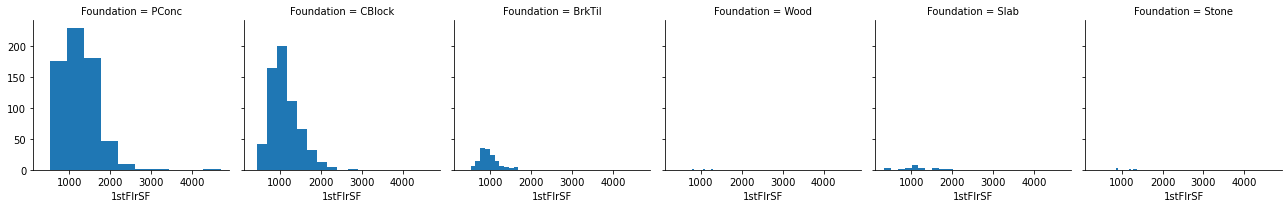

In [11]:
g = sns.FacetGrid(data,col="Foundation") 
g = g.map(plt.hist,"1stFlrSF") 
plt.show()

모든 범주형 변수들에 대해 1stFlrSF의 분포는 왼쪽으로 치우친 분포로 비슷하게 나타났다. 또한, BidgType와 HouseStyle 변수들은 상대적으로 범주별 값의 범위가 다양한 반면, 나머지는 각 범주별 값의 범위가 비슷하다.

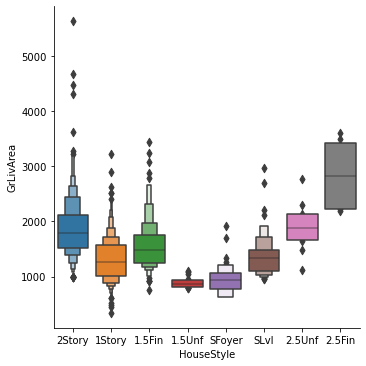

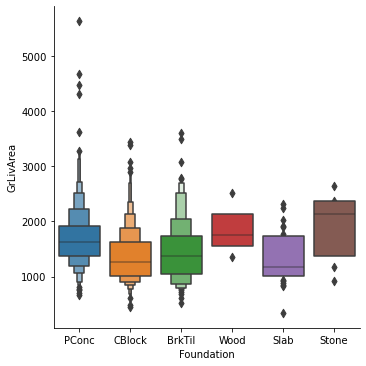

In [12]:
# GrLivArea 변수와 연속형 변수들의 관계
sns.catplot( x='HouseStyle', y='GrLivArea', kind='boxen', data=data)
plt.show()

sns.catplot( x='Foundation', y='GrLivArea', kind='boxen', data=data)
plt.show()


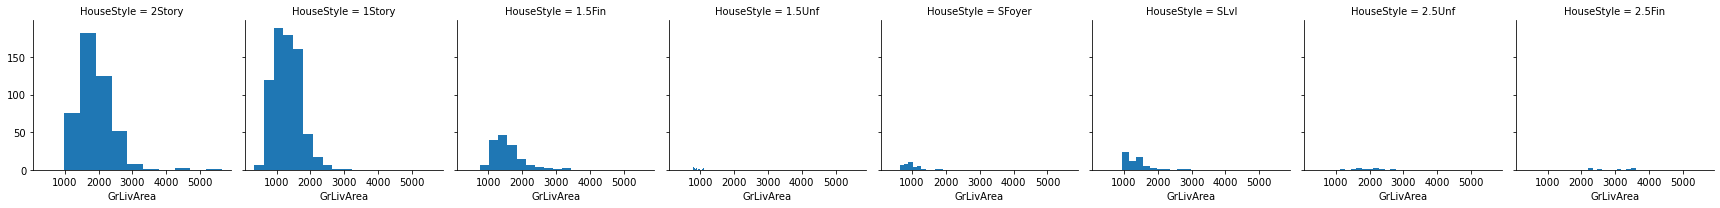

In [13]:
g = sns.FacetGrid(data,col="HouseStyle") 
g = g.map(plt.hist,"GrLivArea") 
plt.show()

- housestyle 변수에 대해서 각 범주별 GrLivArea의 분포의 차이가 크다. 
1층만 있는 집에 비해 1.5층, 2층 집이 GrLivArea가 더 크며, 층이 많아질수록 값이 커진다. 
수가 가장 많았던 2Story, 1Story, 1.5Fin을 비교해보면, 1층집에 비해 2층집의 GrLivArea이 전체적으로 더 크며, 중간값이 500정도 크다. 
- 또한, foundation에 따라서도 PConc로 만들어진 집이 CBlock으로 만들어진 집보다 GrLivArea가 전체적으로 더 크며, 중간값은 약 300 정도 크다.

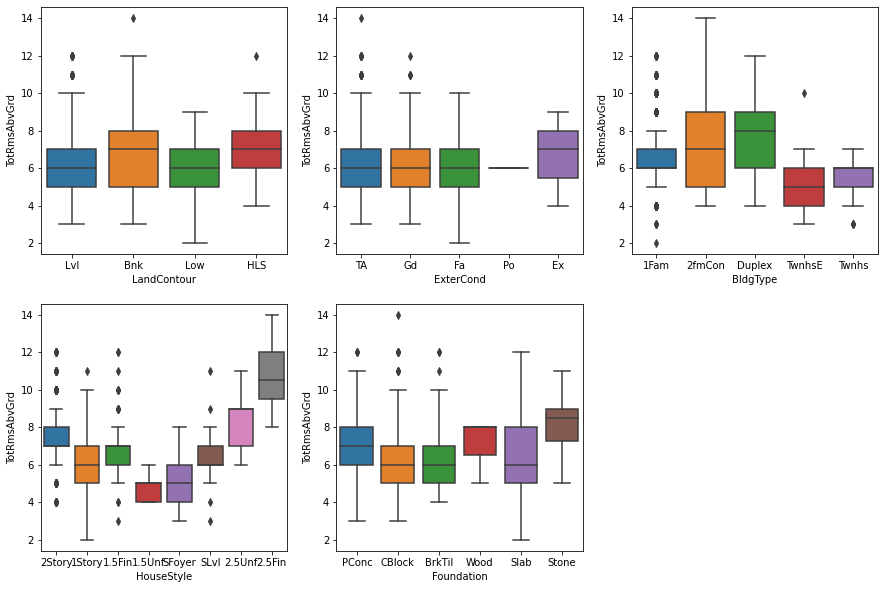

In [14]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 3, 1)
sns.boxplot(x='LandContour', y='TotRmsAbvGrd', data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="ExterCond", y="TotRmsAbvGrd", data = data)

plt.subplot(2, 3, 3)
sns.boxplot(x="BldgType", y="TotRmsAbvGrd", data = data)

plt.subplot(2, 3, 4)
sns.boxplot(x="HouseStyle", y="TotRmsAbvGrd", data = data)

plt.subplot(2, 3, 5)
sns.boxplot(x="Foundation", y="TotRmsAbvGrd", data = data)

plt.show()

TotRmsAbvGrd(방의 수)는 HouseStyle에서 층이 높을수록 많게 나타나며, CBlock이나 BrkTil로 만들어진 집에 비해 다른 자재로 만들어진 집이 더 많다. ExterCond에 따라서는 큰 차이가 없으며, LandContour이 flat(LVl)하거나 Low한 집이 방의 개수가 조금 적은 것으로 보인다.

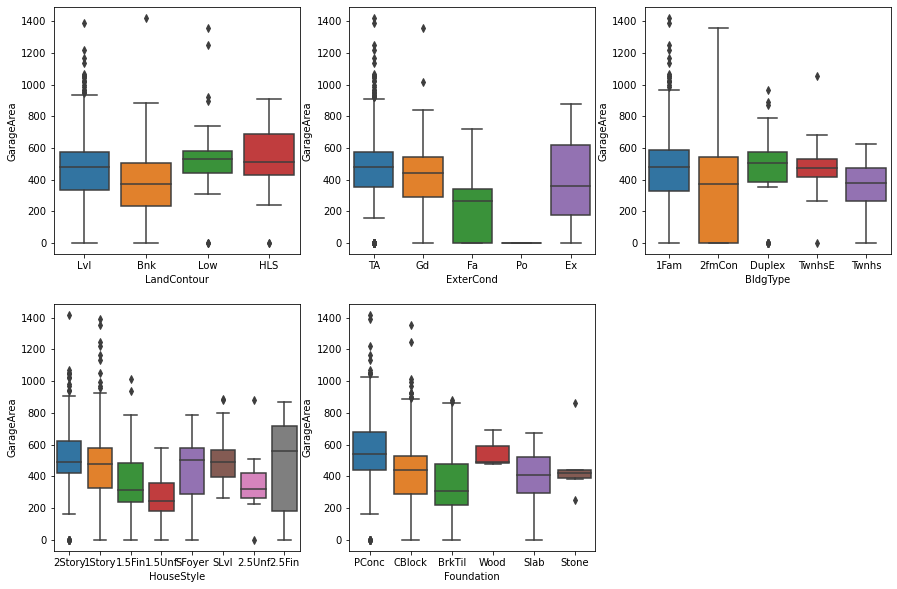

In [15]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 3, 1)
sns.boxplot(x='LandContour', y='GarageArea', data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="ExterCond", y="GarageArea", data = data)

plt.subplot(2, 3, 3)
sns.boxplot(x="BldgType", y="GarageArea", data = data)

plt.subplot(2, 3, 4)
sns.boxplot(x="HouseStyle", y="GarageArea", data = data)

plt.subplot(2, 3, 5)
sns.boxplot(x="Foundation", y="GarageArea", data = data)

plt.show()

다른 연속형 변수들에 비해 GarageArea는 5개의 범주형 변수에 따른 값의 차이가 상대적으로 크다. LandContour이 HLS(hillside)인 경우에 아닌 경우보다 GarageArea가 높은 집이 더 많다. 
또한, ExterCond이 양호(TA), 좋음(Gd), 매우 좋음(Ex)인 경우에 GarageArea가 더 크며, foundation이 PConc와 Wood일 때 크기가 더 큰 것으로 나타난다.

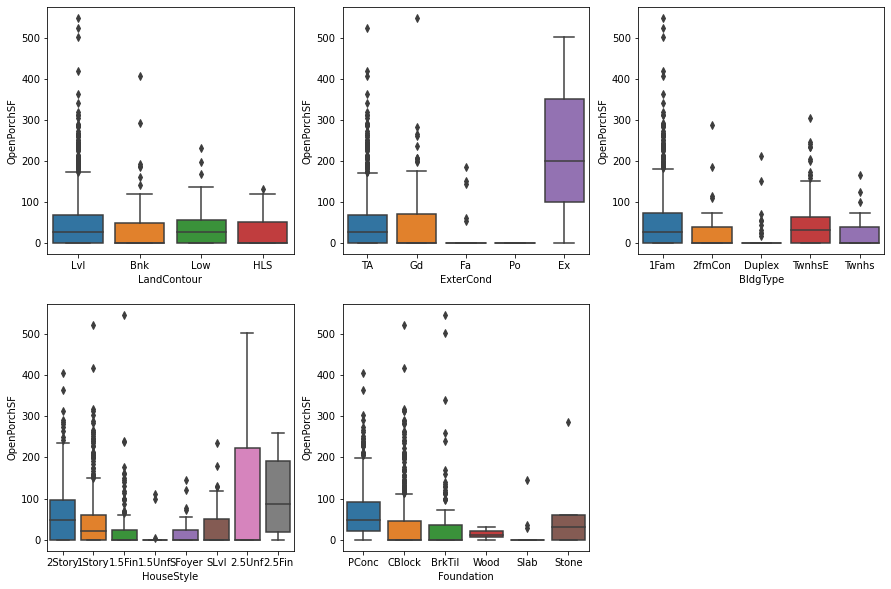

In [16]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 3, 1)
sns.boxplot(x='LandContour', y='OpenPorchSF', data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="ExterCond", y="OpenPorchSF", data = data)

plt.subplot(2, 3, 3)
sns.boxplot(x="BldgType", y="OpenPorchSF", data = data)

plt.subplot(2, 3, 4)
sns.boxplot(x="HouseStyle", y="OpenPorchSF", data = data)

plt.subplot(2, 3, 5)
sns.boxplot(x="Foundation", y="OpenPorchSF", data = data)

plt.show()

모두 왼쪽으로 치우친 분포를 보인다. 또한, 다른 연속형 변수들에 비해 상대적으로 이상치를 많이 갖고 있다.